In [1]:
%pylab inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
initial_data = pd.read_csv('ogdseveritylabeled2.csv')
initial_data.head()

,Unnamed: 0,area,bbox-0,bbox-1,bbox-2,bbox-3,bbox_area,centroid-0,centroid-1,convex_area,...,moments_normalized-3-2,moments_normalized-3-3,orientation,perimeter,solidity,filename,pup_sex,pup_age,pup_id,treatment_group
0,0,82.0,0.0,59.0,14.0,69.0,140.0,5.280488,63.548780,121.0,...,0.001036,0.001296,0.193280,47.834524,0.677686,4-50-4_40x_cortex_1.tif,male,p14,4-50-4,non-treated control
1,1,120.0,0.0,94.0,15.0,106.0,180.0,7.741667,99.516667,143.0,...,-0.000616,-0.000443,-0.341689,48.384776,0.839161,4-50-4_40x_cortex_1.tif,male,p14,4-50-4,non-treated control
2,2,73.0,0.0,246.0,9.0,259.0,117.0,3.397260,250.849315,90.0,...,-0.000437,-0.002065,-0.999323,37.727922,0.811111,4-50-4_40x_cortex_1.tif,male,p14,4-50-4,non-treated control
3,3,76.0,4.0,7.0,14.0,19.0,120.0,9.026316,12.184211,93.0,...,-0.001007,-0.001015,-1.203577,43.591883,0.817204,4-50-4_40x_cortex_1.tif,male,p14,4-50-4,non-treated control
4,4,81.0,8.0,21.0,19.0,33.0,132.0,13.061728,26.111111,91.0,...,0.000027,-0.000098,-1.247603,34.556349,0.890110,4-50-4_40x_cortex_1.tif,male,p14,4-50-4,non-treated control


In [3]:
data = initial_data[['major_axis_length', 'minor_axis_length', 'pup_sex']]
data.sort_values(by=['major_axis_length'])

,major_axis_length,minor_axis_length,pup_sex
11896,9.146877,8.906780,male
1949,9.165151,8.930286,male
9148,9.205406,8.970587,male
12317,9.231059,8.986003,male
22227,9.239211,8.928113,male
...,...,...,...
27017,166.910141,90.861539,male
21140,188.134475,88.099204,male
14979,251.950007,139.286341,male
25836,290.084440,102.889306,male


In [4]:
major_median = data['major_axis_length'].median()
major_stds =  data['major_axis_length'].std()
cut_off_high = major_median + 3 * major_stds
cut_off_low= major_median - 3 * major_stds

In [5]:
data_small = data[data.major_axis_length <= cut_off_high]
data_small = data_small[data_small.major_axis_length >= cut_off_low]

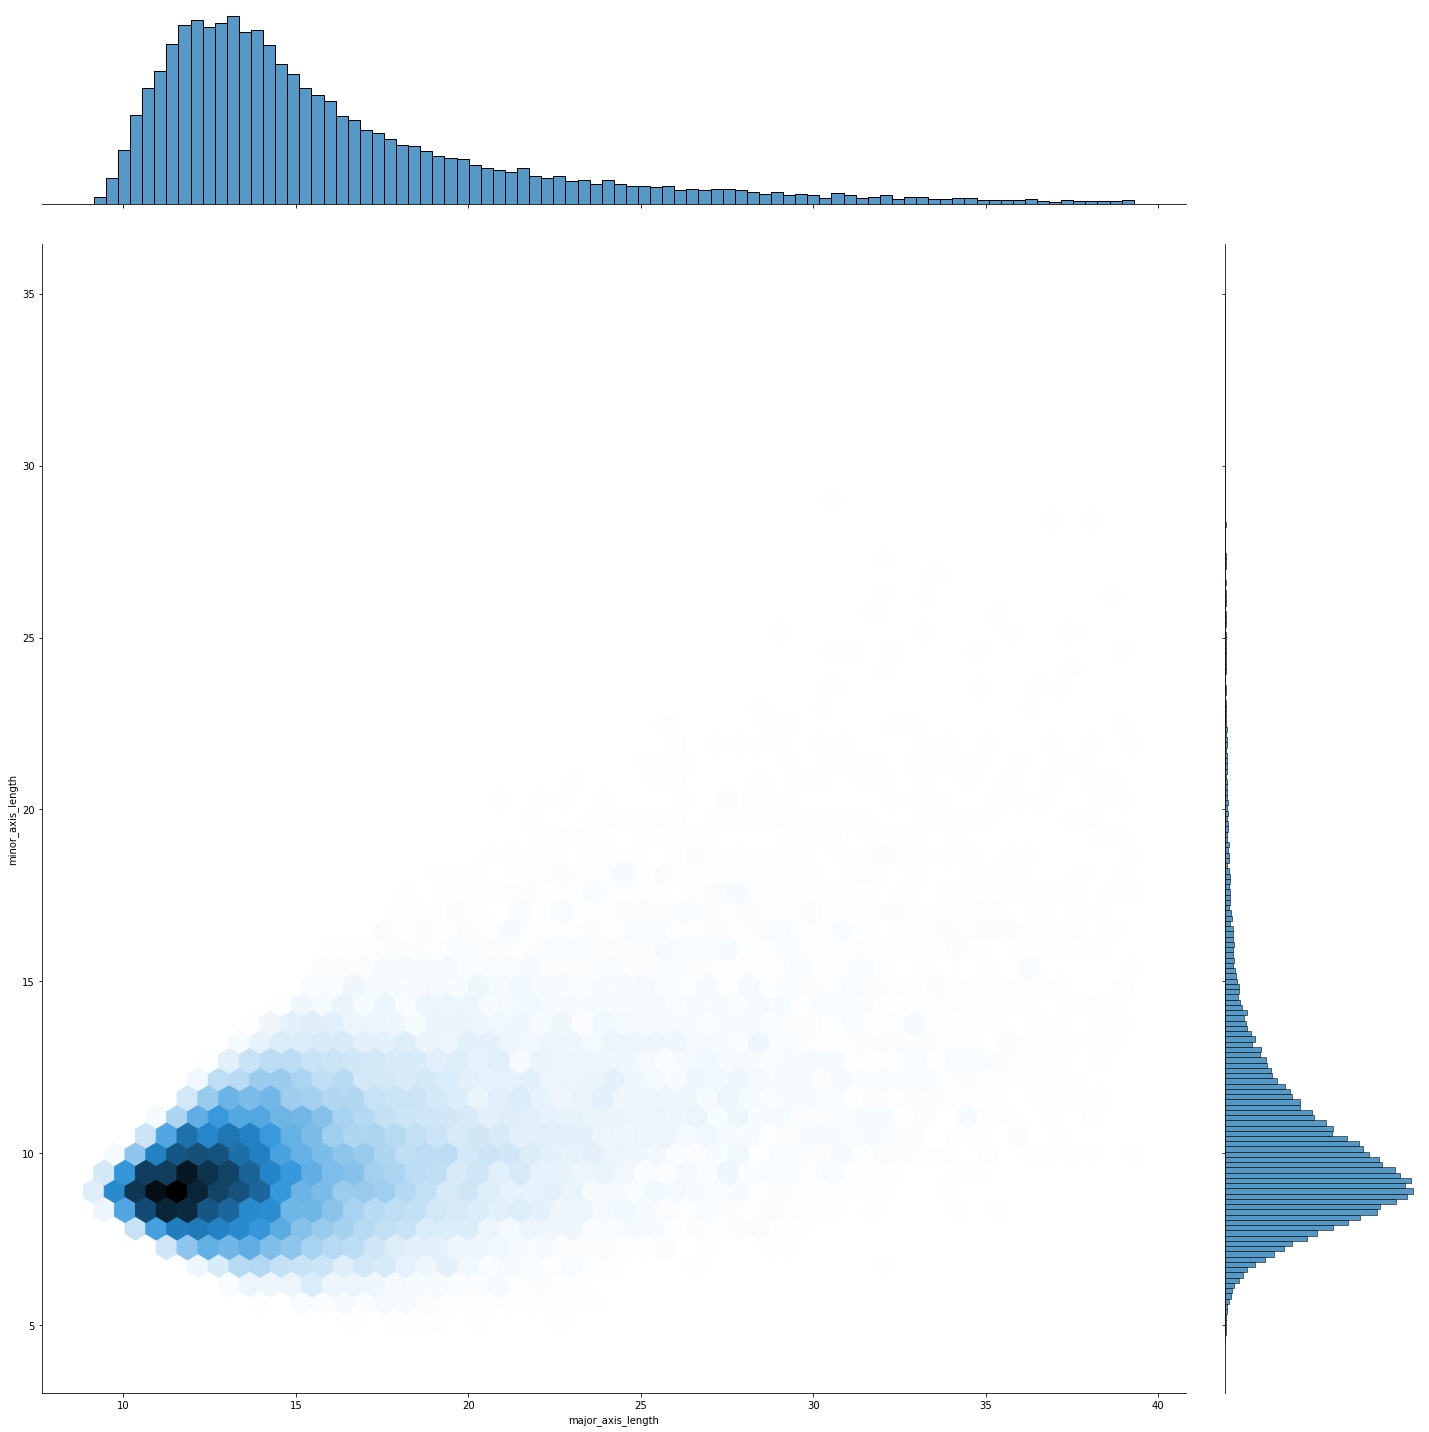

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate some test data

sns.jointplot(data=data_small, x='major_axis_length', y='minor_axis_length', kind='hex' ,height= 20)
plt.show()

In [7]:
import csv

with open('ogdseveritylabeled2.csv') as fin:    
    csvin = csv.DictReader(fin)
    # Category -> open file lookup
    outputs = {}
    for row in csvin:
        cat = row['treatment_group']
        # Open a new file and write the header
        if cat not in outputs:
            fout = open('{}.csv'.format(cat), 'w')
            dw = csv.DictWriter(fout, fieldnames=csvin.fieldnames)
            dw.writeheader()
            outputs[cat] = fout, dw
        # Always write the row
        outputs[cat][1].writerow(row)
    # Close all the files
    for fout, _ in outputs.values():
        fout.close()

In [8]:
initial_data = pd.read_csv('non-treated control.csv')
initial_data.head()

dataNoneTreatment = initial_data[['major_axis_length', 'minor_axis_length']]
dataNoneTreatment.sort_values(by=['major_axis_length'])

major_median = dataNoneTreatment ['major_axis_length'].median()
major_stds =  dataNoneTreatment ['major_axis_length'].std()

cut_off_high = major_median + 3 * major_stds
cut_off_low= major_median - 3 * major_stds

data_small_NonTreatment = dataNoneTreatment [dataNoneTreatment.major_axis_length <= cut_off_high]
data_small_NonTreatment  = data_small_NonTreatment [data_small_NonTreatment .major_axis_length >= cut_off_low]

In [9]:
initial_data1 = pd.read_csv('ogd 0.5 hours.csv')
initial_data1.head()

datapoint5 = initial_data1[['major_axis_length', 'minor_axis_length']]
datapoint5.sort_values(by=['major_axis_length'])

major_median = datapoint5 ['major_axis_length'].median()
major_stds =  datapoint5['major_axis_length'].std()

cut_off_high = major_median + 3 * major_stds
cut_off_low= major_median - 3 * major_stds

data_small_point5 = datapoint5[datapoint5.major_axis_length <= cut_off_high]
data_small_point5  = data_small_point5 [data_small_point5 .major_axis_length >= cut_off_low]

In [10]:
initial_data2 = pd.read_csv('ogd 1.5 hours.csv')
initial_data2.head()
dataOnePoint5 = initial_data2[['major_axis_length', 'minor_axis_length']]
dataOnePoint5.sort_values(by=['major_axis_length'])
major_median = dataOnePoint5['major_axis_length'].median()
major_stds =  dataOnePoint5['major_axis_length'].std()
cut_off_high = major_median + 3 * major_stds
cut_off_low = major_median - 3 * major_stds
data_small_OnePoint5 = dataOnePoint5[dataOnePoint5.major_axis_length <= cut_off_high]
data_small_OnePoint5  = data_small_OnePoint5[data_small_OnePoint5.major_axis_length >= cut_off_low]

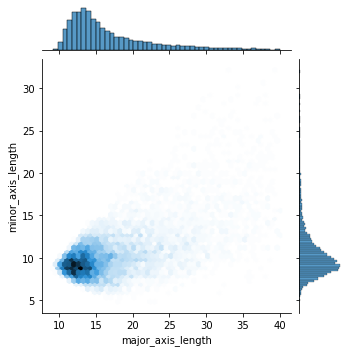

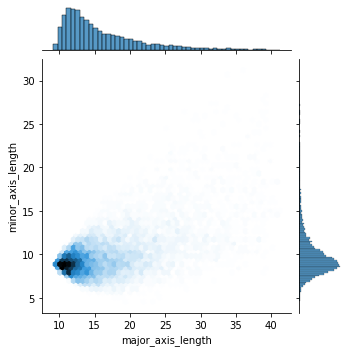

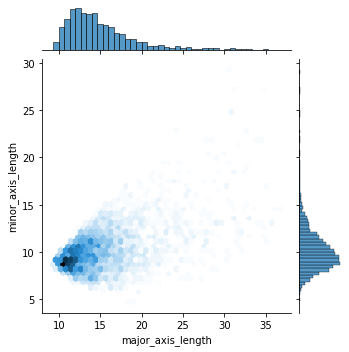

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate some test data

sns.jointplot(data=data_small_NonTreatment, x='major_axis_length', y='minor_axis_length', kind='hex' ,height= 5)
plt.show()

sns.jointplot(data=data_small_point5, x='major_axis_length', y='minor_axis_length', kind='hex' ,height= 5)
plt.show()

sns.jointplot(data=data_small_OnePoint5, x='major_axis_length', y='minor_axis_length', kind='hex' ,height= 5)
plt.show()

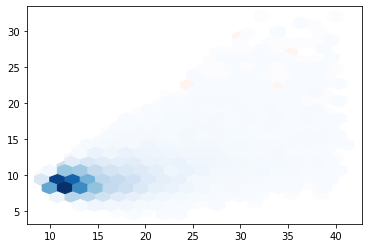

In [12]:



# HEXBIN
# Hexbin seems a bad choice because I think you cant control the size of the hexagons.

plt.hexbin(data=data_small_OnePoint5, x='major_axis_length', y='minor_axis_length',gridsize=20,cmap="Reds",mincnt=1)
plt.hexbin(data=data_small_NonTreatment, x='major_axis_length', y='minor_axis_length',gridsize=20,cmap="Purples",mincnt=1)
plt.hexbin(data=data_small_point5, x='major_axis_length', y='minor_axis_length',gridsize=20,cmap="Blues",mincnt=1)
plt.show()


In [13]:
plt.scatter(data=data_small_point5, x='major_axis_length', y='minor_axis_length', c = "#1900ff",s=90,alpha=alpha)
plt.scatter(data=data_small_OnePoint5, x='major_axis_length', y='minor_axis_length', c = "#FF0000",s=90,alpha=alpha)
plt.scatter(data=data_small_NonTreatment, x='major_axis_length', y='minor_axis_length', c = "#f2ff00",s=90,alpha=alpha)
plt.show()

NameError: name 'alpha' is not defined

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


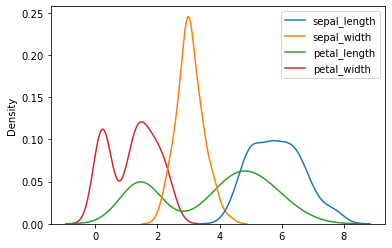

In [14]:
iris = sns.load_dataset("iris")
sns.kdeplot(data=iris)
iris.head()

<AxesSubplot:xlabel='major_axis_length', ylabel='minor_axis_length'>

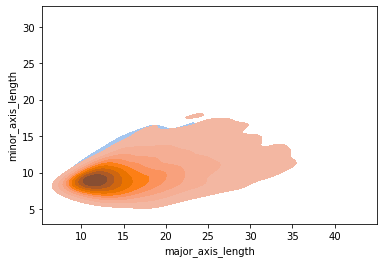

In [15]:
fig, ax = plt.subplots()
sns.kdeplot(
    data=data_small_OnePoint5, x="major_axis_length", y="minor_axis_length", fill=True,ax=ax
)
sns.kdeplot(
    data=data_small_point5, x="major_axis_length", y="minor_axis_length", fill=True,ax=ax
)

C:\Users\alito\anaconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'c'
  cset = contour_func(


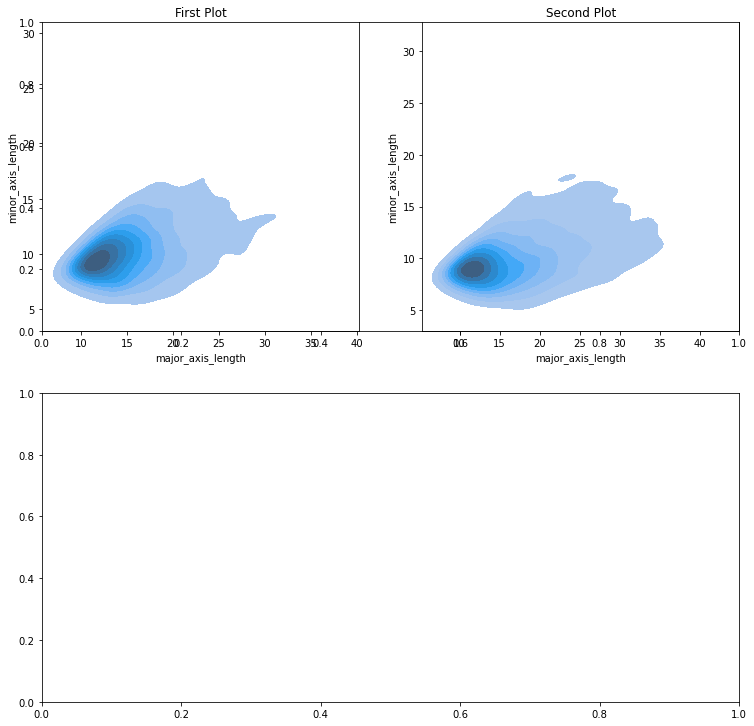

In [16]:
fig, (ax1, ax2) = plt.subplots(2)
fig.set_size_inches(12.5, 12.5)
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax1.title.set_text('First Plot')
ax2.title.set_text('Second Plot')

red = sns.kdeplot(data=data_small_OnePoint5, x="major_axis_length", y="minor_axis_length", fill=True,ax=ax1, c = "FF5733")
blue = sns.kdeplot(data=data_small_point5, x="major_axis_length", y="minor_axis_length", fill=True,ax=ax2)



<IPython.core.display.Javascript object>


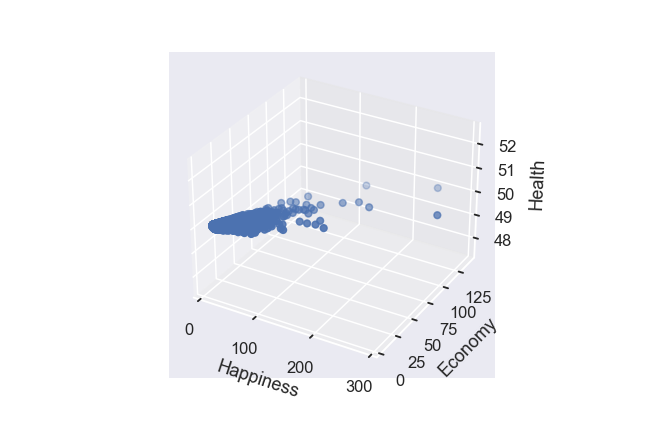

In [17]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

df = pd.read_csv('ogdseveritylabeled2.csv')
sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df['major_axis_length']
y = df['minor_axis_length']
z =50

ax.set_xlabel("Happiness")
ax.set_ylabel("Economy")
ax.set_zlabel("Health")

ax.scatter(x, y, z)

plt.show()

<IPython.core.display.Javascript object>


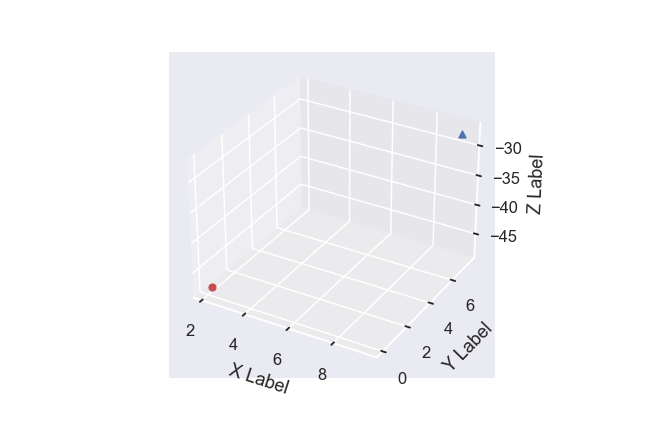

[2.13852223]
[9.37490098]


In [18]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


def randrange(n, vmin, vmax):
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 1

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 0, 10)
    ys = randrange(n, 0, 10)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, c=c, marker=m)
    print(xs)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [19]:
import re, seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# none Treated Group
df_non_treated = pd.read_csv('non-treated control.csv')
x_non_treated = df_non_treated['major_axis_length']
y_non_treated = df_non_treated['minor_axis_length']

# 0.5 hours 
df_point_five_hours = pd.read_csv('ogd 0.5 hours.csv')
x_point_five_hours = df_point_five_hours['major_axis_length 
y_point_five_hours = df_point_five_hours['minor_axis_length']

# 1.5 hours 
df_one_point_five_hours = pd.read_csv('ogd 1.5 hours.csv')
x_one_point_five_hours = df_one_point_five_hours['major_axis_length']
y_one_point_five_hours = df_one_point_five_hours['minor_axis_length']

# 3 hours + SOD
df_three_hours_SOD = pd.read_csv('ogd 3 hours + SOD.csv')
x_three_hours_SOD = df_three_hours_SOD['major_axis_length']
y_three_hours_SOD = df_three_hours_SOD['minor_axis_length']

# 3 hours 
df_three_hours = pd.read_csv('ogd 3 hours.csv')
x_three_hours = df_three_hours['major_axis_length']
y_three_hours= df_three_hours['minor_axis_length']


<IPython.core.display.Javascript object>


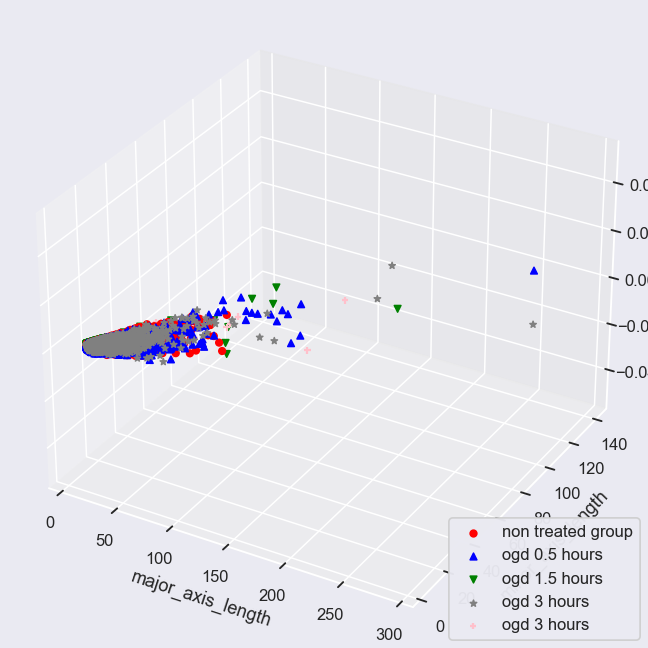

C:\Users\alito\AppData\Local\Temp/ipykernel_7440/1692160372.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


In [21]:
from matplotlib import cm
# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)


# plot of non_treated
sc = ax.scatter(x_non_treated, y_non_treated,  c='red', marker='o', cmap=cm, alpha=1)
sc = ax.scatter(x_point_five_hours, y_point_five_hours,  c='blue', marker='^', cmap=cm, alpha=1)
sc = ax.scatter(x_one_point_five_hours, y_one_point_five_hours,  c='green', marker='v', cmap=cm, alpha=1)
sc = ax.scatter(x_three_hours_SOD, y_three_hours_SOD, c='gray', marker='*', cmap=cm, alpha=1)
sc = ax.scatter(x_three_hours, y_three_hours, c='pink', marker='+', cmap=cm, alpha=1)

legend = plt.legend(["non treated group", "ogd 0.5 hours", "ogd 1.5 hours", "ogd 3 hours", "ogd 3 hours"], loc ="lower right")

ax.add_artist(legend)
ax.set_xlabel('major_axis_length')
ax.set_ylabel('minor_axis_length')
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)